### CV_Mini_Project

In [2]:
## ==================================================
## [1-1] 모듈 로딩
## ==================================================
import pandas as pd 
import numpy as np
import os
import cv2

## ML학습 관련
from sklearn.ensemble import RandomForestClassifier

## ML 데이터셋 및 전처리 관련
from sklearn.model_selection import train_test_split

## ML CV 관련
from sklearn.model_selection import GridSearchCV

## ML 성능지표 관련
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## 시각화 관련
import matplotlib.pyplot as plt

In [3]:
## ==================================================
## [1-2] 데이터 준비 및 확인
## ==================================================
## 데이터
DATA_FILE1  = '../PrData/csv/White.csv'
DATA_FILE2 = '../PrData/csv/Yellow.csv'
DATA_FILE3 = '../PrData/csv/Black.csv'

## 데이터 로딩
df1 = pd.read_csv(DATA_FILE1, header=None)
df2 = pd.read_csv(DATA_FILE2, header=None)
df3 = pd.read_csv(DATA_FILE3, header=None)
df = pd.concat([df1, df2, df3], axis=0)

## 데이터 기본정보 확인
display( df.head(2) )
display( df.tail(2) )
df.info()


0      1      2      3      4      5      6      7      8      9      ...  \
0  white    253    252    255    250    250    253    249    252    251  ...   
1  white    227    214    203    228    213    201    228    210    198  ...   

   14691  14692  14693  14694  14695  14696  14697  14698  14699  14700  
0    206    247    212    208    244    209    205    242    207    203  
1    221    235    232    230    240    239    238    239    238    240  

[2 rows x 14701 columns]

0      1      2      3      4      5      6      7      8      9      ...  \
98  black    253    253    254    251    248    248    202    197    195  ...   
99  black    106     87     55    117     92     62    130     97     70  ...   

    14691  14692  14693  14694  14695  14696  14697  14698  14699  14700  
98    222    249    249    248    250    252    251    251    253    252  
99     17     41     22     18     45     20     18     52     22     19  

[2 rows x 14701 columns]

<class 'pandas.core.frame.DataFrame'>
Index: 330 entries, 0 to 99
Columns: 14701 entries, 0 to 14700
dtypes: int64(14700), object(1)
memory usage: 37.0+ MB


In [4]:
## ==================================================
## [2-1] 피쳐/타겟 분리
## ==================================================
featureDF = df[df.columns[1:]]
targetSR  = df[df.columns[0]]

print(f'featureDF:{featureDF.shape},  targetSR:{targetSR.shape}')

featureDF:(330, 14700),  targetSR:(330,)


In [5]:
## ==================================================
## [2-2] 학습용/테스트용 분리
## ==================================================
x_train, x_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=targetSR)

print(f'[TRAIN] x_train:{x_train.shape},  y_train:{y_train.shape}')
print(f'[TEST] x_test:{x_test.shape},  y_test:{y_test.shape}')

[TRAIN] x_train:(264, 14700),  y_train:(264,)
[TEST] x_test:(66, 14700),  y_test:(66,)


In [ ]:
# 최적의 하이퍼파라미터 찾기
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

grid_rf = GridSearchCV(estimator=rf,
                       param_grid=param_grid,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1
)

grid_rf.fit(x_train, y_train)

# 결과 확인
print("최적 파라미터:", grid_rf.best_params_)
print("정확도:", grid_rf.best_score_)


최적 파라미터: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
정확도: 0.8750362844702467


In [7]:
# 모델 생성
rModel = RandomForestClassifier(n_estimators=100,
                                criterion='entropy',
                                min_samples_leaf= 2,
                                min_samples_split= 2,
                                random_state=42)

# 학습
rModel.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2, random_state=42)

In [8]:
# 성능 평가
train_score = rModel.score(x_train, y_train)
test_score  = rModel.score(x_test, y_test)

print(f'train_score : {train_score}   test_score : {test_score}')

train_score : 1.0   test_score : 0.8181818181818182


In [9]:
# 예측
y_pred = rModel.predict(x_test)

# 성능 평가 지표
print("정확도:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

정확도: 0.8181818181818182
              precision    recall  f1-score   support

       black       0.79      0.75      0.77        20
       white       0.90      0.95      0.93        20
      yellow       0.77      0.77      0.77        26

    accuracy                           0.82        66
   macro avg       0.82      0.82      0.82        66
weighted avg       0.82      0.82      0.82        66



### 임의의 이미지로 예측해보기

In [10]:
def load_rgb_image(path):
    img = cv2.imread(path)              # 컬러로 읽기 (BGR)
    img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    img = cv2.resize(img, (70, 70), interpolation=cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.reshape(1, -1)             # (1, 14700)
    return img

In [29]:
img1   = load_rgb_image('../PrData/predict/pwhite.jpg')
img2_1 = load_rgb_image('../PrData/predict/pyellow.jpg')
img2_2 = load_rgb_image('../PrData/predict/pyellow2.jpg')
img3   = load_rgb_image('../PrData/predict/pblack.jpg')

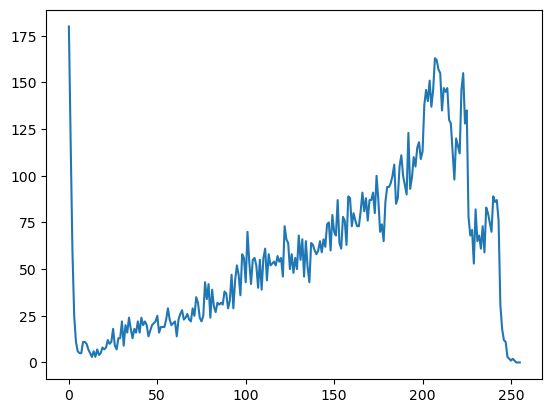

In [34]:
channels = cv2.split(img1)
for (ch,color) in zip(channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist)
plt.show()

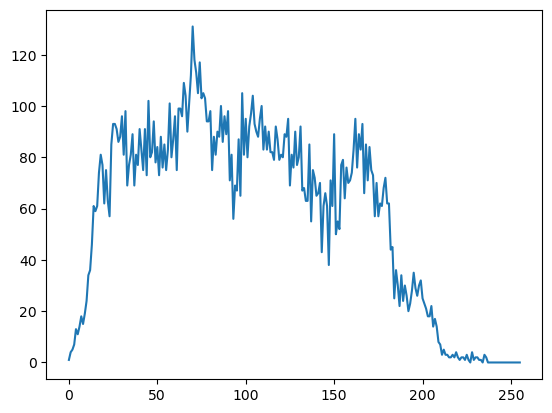

In [31]:
channels = cv2.split(img2_1)
for (ch,color) in zip(channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist)
plt.show()

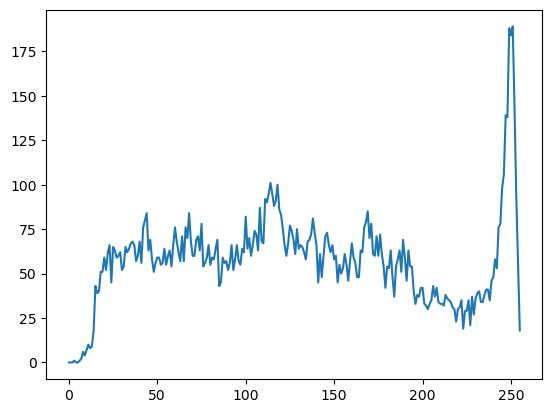

In [30]:
channels = cv2.split(img2_2)
for (ch,color) in zip(channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist)
plt.show()

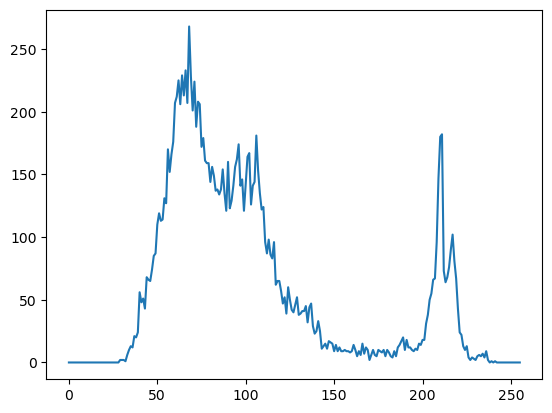

In [23]:
channels = cv2.split(img3)
for (ch,color) in zip(channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist)
plt.show()

In [ ]:
## 백인 사진 넣어보기
pred_label = rModel.predict(img1)
proba = rModel.predict_proba(img1)

print("사진 예측 결과 :", pred_label[0])     

print(f'흑인일 확률 : {proba[0][0]*100}%')
print(f'백인일 확률 : {proba[0][1]*100}%')
print(f'황인일 확률 : {proba[0][2]*100}%')

사진 예측 결과 : white
흑인으로 예측할 확률 : 1.0%
백인으로 예측할 확률 : 75.33333333333333%
황인으로 예측할 확률 : 23.666666666666664%


In [32]:
## 황인 사진 넣어보기
pred_label = rModel.predict(img2_1)
proba = rModel.predict_proba(img2_1)

print("사진 예측 결과 :", pred_label[0])     

print(f'흑인일 확률 : {proba[0][0]*100}%')
print(f'백인일 확률 : {proba[0][1]*100}%')
print(f'황인일 확률 : {proba[0][2]*100}%')

사진 예측 결과 : yellow
흑인일 확률 : 43.86666666666667%
백인일 확률 : 0.0%
황인일 확률 : 56.13333333333333%


In [33]:
## 황인 사진 넣어보기
pred_label = rModel.predict(img2_2)
proba = rModel.predict_proba(img2_2)

print("사진 예측 결과 :", pred_label[0])     

print(f'흑인일 확률 : {proba[0][0]*100}%')
print(f'백인일 확률 : {proba[0][1]*100}%')
print(f'황인일 확률 : {proba[0][2]*100}%')

사진 예측 결과 : yellow
흑인일 확률 : 3.7000000000000006%
백인일 확률 : 3.9%
황인일 확률 : 92.4%


In [ ]:
## 흑인 사진 넣어보기
pred_label = rModel.predict(img3)
proba = rModel.predict_proba(img3)

print("사진 예측 결과 :", pred_label[0])     

print(f'흑인일 확률 : {proba[0][0]*100}%')
print(f'백인일 확률 : {proba[0][1]*100}%')
print(f'황인일 확률 : {proba[0][2]*100}%')

사진 예측 결과 : black
흑인으로 예측할 확률 : 90.43333333333332%
백인으로 예측할 확률 : 0.0%
황인으로 예측할 확률 : 9.566666666666666%
